In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# cek sub-direktori
!ls /content/drive/Shareddrives/Capstone/DatasetBaruLagi2


his_museum  makanan  nature_adv_park  waterpark  zoo


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
import imghdr
from sklearn.preprocessing import LabelEncoder

In [ ]:
# data direktori
DATA_DIR="/content/drive/Shareddrives/Capstone/DatasetBaruLagi2"

In [ ]:
# cek jumlah file
for image_class in os.listdir(DATA_DIR):
    print(f"{image_class}: {len(os.listdir(os.path.join(DATA_DIR, image_class)))}")

waterpark: 206
makanan: 248
his_museum: 233
nature_adv_park: 263
zoo: 203


In [ ]:
# ekstensi gambar yang support
image_exts = ['jpeg','jpg', 'bmp', 'png']

# menghapus gambar selain ekstensi yang disupport
for image_class in os.listdir(DATA_DIR):
    for image in os.listdir(os.path.join(DATA_DIR, image_class)):
        image_path = os.path.join(DATA_DIR, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        # menghapus gambar yang tidak dapat dibuka
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [ ]:
# data pipeline
data = tf.keras.utils.image_dataset_from_directory('/content/drive/Shareddrives/Capstone/DatasetBaruLagi')

Found 1169 files belonging to 5 classes.


In [ ]:
# normalisasi values
data = data.map(lambda x,y: (x/255, y))

In [ ]:
# jumlah batch
len(data)

37

In [ ]:
# membagi dataset menjadi train, validation, dan test
train_size = int(len(data)*.8)+2
val_size = int(len(data)*.1)
test_size = int(len(data)*.1)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

print(f"Train Size: {len(train)}")
print(f"Validation Size: {len(val)}")
print(f"Test Size: {len(test)}")

Train Size: 31
Validation Size: 3
Test Size: 3


In [ ]:
# Contoh dataset training
labels = ['zoo', 'nature_adv_park', 'his_museum', 'waterpark', 'makanan']
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(labels)

# Cek urutan labels
print(label_encoder.classes_)

['his_museum' 'makanan' 'nature_adv_park' 'waterpark' 'zoo']


In [ ]:
# Mendapatkan file paths dengan menggunakan image_dataset_from_directory
data_with_filenames = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/Shareddrives/Capstone/DatasetBaruLagi2',
    label_mode=None,  # Hilangkan label jika hanya ingin file paths
    batch_size=1,  # Batch size = 1 untuk mempermudah akses
    image_size=(256, 256),  # Sesuaikan ukuran gambar jika diperlukan
)

# Melihat file paths pada data train
file_paths = data_with_filenames.file_paths

# Menampilkan file paths pada dataset train
print("File Paths in Train Dataset:")
for file_path in file_paths[:train_size]:
    print(file_path)

Found 1147 files.
File Paths in Train Dataset:
/content/drive/Shareddrives/Capstone/DatasetBaruLagi2/zoo/WhatsApp Image 2024-12-03 at 9.54.48 PM.jpeg
/content/drive/Shareddrives/Capstone/DatasetBaruLagi2/his_museum/historical (86).jpg
/content/drive/Shareddrives/Capstone/DatasetBaruLagi2/nature_adv_park/Untitled design.jpg
/content/drive/Shareddrives/Capstone/DatasetBaruLagi2/zoo/WhatsApp Image 2024-12-04 at 12.52.07 AM.jpeg
/content/drive/Shareddrives/Capstone/DatasetBaruLagi2/makanan/blog-moment-memperkenalkan-makanan-tradisional-di-kegiatan-pengenalan-kampus-46-l.jpg
/content/drive/Shareddrives/Capstone/DatasetBaruLagi2/zoo/WhatsApp Image 2024-12-04 at 12.57.11 AM.jpeg
/content/drive/Shareddrives/Capstone/DatasetBaruLagi2/makanan/Copy of gudeg_247.jpg
/content/drive/Shareddrives/Capstone/DatasetBaruLagi2/nature_adv_park/190919681-847162899510951-1347986893474205150-n-fcdadc805d1239aed2045bfd1a6c02e8.jpg
/content/drive/Shareddrives/Capstone/DatasetBaruLagi2/nature_adv_park/1174717_72

In [ ]:
# model with CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(256,256,3)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
# inspect model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      14,745,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,896,581 (56.83 MB)

 Trainable params: 14,896,581 (56.83 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler

def lr_schedule(epoch):
    lr = 0.001
    if epoch > 10:
        lr = 0.0005
    if epoch > 20:
        lr = 0.0001
    if epoch > 50:
        lr = 0.00005
    return lr

In [ ]:
# inisiasi callback
class EarlyStoppingCallback(tf.keras.callbacks.Callback):

    def on_epoch_end(self, epoch, logs=None):
        if logs['accuracy'] >= 0.99 and logs['val_accuracy'] >= 0.99:
            self.model.stop_training = True

            print("\nReached 99% train accuracy and 99% validation accuracy, so cancelling training!")

In [ ]:
EPOCHS=50

In [ ]:
# train model
hist = model.fit(
    train,
    epochs=EPOCHS,
    validation_data=val,
    callbacks=[EarlyStoppingCallback()]
)

Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 247s 8s/step - accuracy: 0.2703 - loss: 1.7978 - val_accuracy: 0.4688 - val_loss: 1.3131
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.5253 - loss: 1.1784 - val_accuracy: 0.6771 - val_loss: 0.8585
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 22s 702ms/step - accuracy: 0.6293 - loss: 0.9377 - val_accuracy: 0.6146 - val_loss: 0.8132
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 30s 971ms/step - accuracy: 0.6967 - loss: 0.7931 - val_accuracy: 0.7917 - val_loss: 0.6046
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 656ms/step - accuracy: 0.6914 - loss: 0.7363 - val_accuracy: 0.8958 - val_loss: 0.3956
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 21s 684ms/step - accuracy: 0.7760 - loss: 0.5488 - val_accuracy: 0.8750 - val_loss: 0.5192
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 668ms/step - accuracy: 0.8115 - loss: 0.5379 - val_accuracy: 0.8333 - val_loss: 0.4417
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 21s 692ms/step - accuracy: 0.8528 - loss: 0.4105 - val_accuracy:

In [ ]:
# evaluasi model pada validation dataset
loss, accuracy = model.evaluate(val)

print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 365ms/step - accuracy: 1.0000 - loss: 0.0048
Validation Loss: 0.007481884676963091
Validation Accuracy: 1.0


In [ ]:
# evaluasi model pada test dataset
test_loss, test_accuracy = model.evaluate(test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 1.0000 - loss: 0.0039
Test Loss: 0.0033333252649754286
Test Accuracy: 1.0


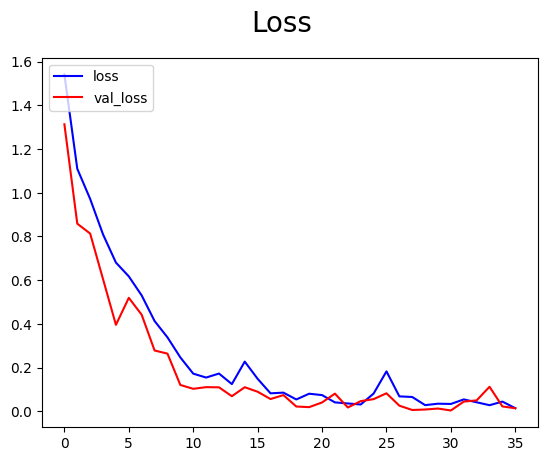

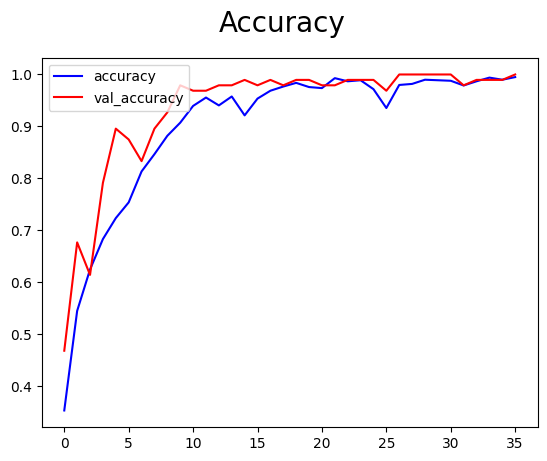

In [ ]:
# meanmpilkan grafik loss dan accuracy
fig = plt.figure()
plt.plot(hist.history['loss'], color='blue', label='loss')
plt.plot(hist.history['val_loss'], color='red', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='blue', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='red', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
# daftar nama kelas
class_names = ['hism', 'food', 'nature', 'water', 'zoo']

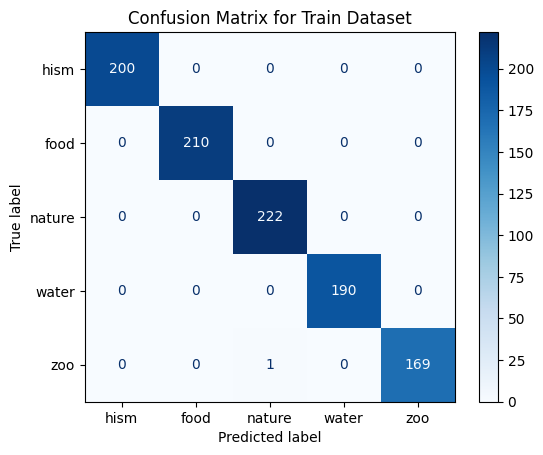

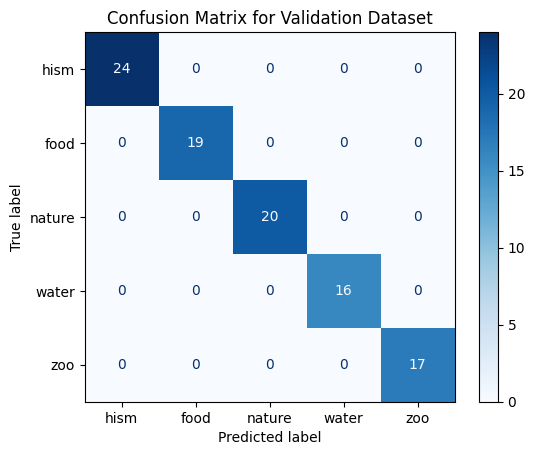

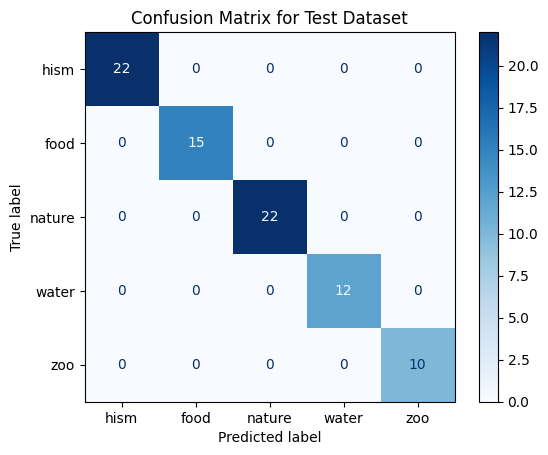

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Fungsi untuk menghitung confusion matrix dan menampilkan
def plot_confusion_matrix(dataset, dataset_name):
    all_labels = []
    all_predictions = []

    for images, labels in dataset:
        predictions = model.predict(images, verbose=0)
        predicted_labels = np.argmax(predictions, axis=1)

        all_labels.extend(labels.numpy())
        all_predictions.extend(predicted_labels)

    # Membuat confusion matrix
    cm = confusion_matrix(all_labels, all_predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

    # Menampilkan confusion matrix
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix for {dataset_name} Dataset")
    plt.show()

# Menampilkan confusion matrix untuk setiap dataset
plot_confusion_matrix(train, "Train")
plot_confusion_matrix(val, "Validation")
plot_confusion_matrix(test, "Test")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 933ms/step


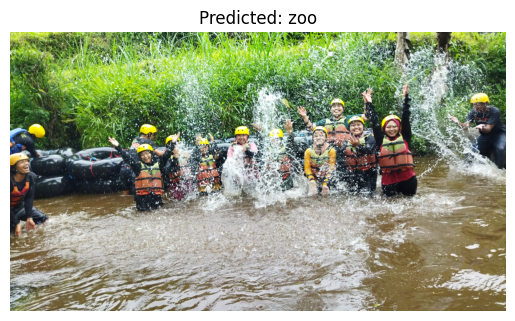


Confidence: 0.99


In [ ]:
# fungsi untuk memuat gambar
def prepare_image(image_path, img_size=(256, 256)):
    try:
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, img_size)
        img = img / 255.0
        return np.expand_dims(img, axis=0)
    except Exception as e:
        print(f"Error in processing the image: {e}")
        return None

# path gambar untuk testing
test_image_path = "/content/drive/Shareddrives/Capstone/Tes (1)/Adv_1.jpg"
# memproses gambar testing
test_image = prepare_image(test_image_path)

# prediksi gambar testing
if test_image is not None:
    predictions = model.predict(test_image)
    predicted_class_idx = np.argmax(predictions)
    confidence = np.max(predictions)
    predicted_class_name = class_names[predicted_class_idx]

    # menampilkan hasil prediksi
    plt.imshow(cv2.cvtColor(cv2.imread(test_image_path), cv2.COLOR_BGR2RGB))
    plt.title(f"Predicted: {predicted_class_name}")
    plt.axis('off')
    plt.show()

    print(f"\nConfidence: {confidence:.2f}")

else:
    print("Image preparation failed.")

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('/content/drive/Shareddrives/Capstone/Model_Image_Recognition','imageclass_model_new1.h5'))